<a href="https://colab.research.google.com/github/Sidmon101/Multilingual-NER/blob/main/Flaskapp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install flask-ngrok
!pip install pyngrok==4.1.1
!pip install --upgrade spacy

!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm
!python -m spacy download de_core_news_sm
!python -m spacy download fr_core_news_sm

!ngrok authtoken 29CplAA9ntnMkpYdcDxIEZC4qGz_4tZ9TwJJTnffMuBt8JDkN

     |████████████████████████████████| 12.8 MB 8.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     |████████████████████████████████| 12.9 MB 8.6 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
     |████████████████████████████████| 14.6 MB 10.7 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
     |████████████████████████████████| 16.3 MB 9.0 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://69ee-35-233-195-110.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [16/May/2022 08:40:06] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [16/May/2022 08:40:07] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [16/May/2022 08:45:47] "POST /getprediction HTTP/1.1" 200 -


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


127.0.0.1 - - [16/May/2022 08:46:10] "POST /getprediction HTTP/1.1" 200 -


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


127.0.0.1 - - [16/May/2022 08:52:13] "POST /getprediction HTTP/1.1" 200 -


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


127.0.0.1 - - [16/May/2022 08:52:35] "POST /getprediction HTTP/1.1" 200 -
127.0.0.1 - - [16/May/2022 08:52:54] "POST /getprediction HTTP/1.1" 200 -


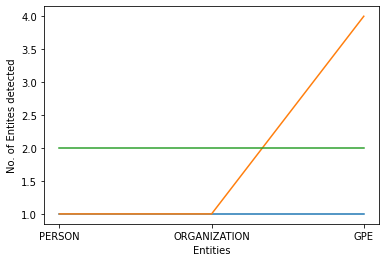

In [ ]:
import nltk
nltk.download('stopwords')
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords
import nltk
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import spacy
from spacy.lang.es.examples import sentences 
from spacy.scorer import Scorer
nls = spacy.load("es_core_news_sm")
nlg = spacy.load("de_core_news_sm")
nle = spacy.load("en_core_web_sm")
nlf = spacy.load("fr_core_news_sm")

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

from flask import Flask,request,render_template
from flask_ngrok import run_with_ngrok
import pickle
import numpy as np
app=Flask(__name__)
run_with_ngrok(app)



@app.route('/')
def home():
    return render_template('input.html')

@app.route('/getprediction',methods=['POST'])
def getprediction():

    text = request.form['data']
    option = request.form['options']  
    if option == "english":
        nltk.download('punkt')  
        words = nltk.word_tokenize(text)
        pos_tags = nltk.pos_tag(words)
        chunks = nltk.ne_chunk(pos_tags)
        entities =[]
        labels =[]
        d = dict()
        for chunk in chunks:
            if hasattr(chunk,'label'):
                entities.append(' '.join(c[0] for c in chunk))
                labels.append(chunk.label())

        for i in range(0,len(entities)):
            d[entities[i]] = labels[i]
        
        res = Counter(d.values())
        xpoints = []
        ypoints = []
        for i in res.keys():
          xpoints.append(i)
        for j in res.values():
          ypoints.append(j)
        plt.xlabel("Entities")
        plt.ylabel("No. of Entites detected")
        plt.plot(xpoints, ypoints)
        plt.savefig("/content/templates/output.jpg")
        entities_labels = []
        for i in range(0, len(entities)):
          entities_labels.append((entities[i], labels[i]))
        return render_template('result.html', output=entities_labels)


    elif option == "spanish":  
        d = list()
        def show_ents(doc):
            if doc.ents:
                for ent in doc.ents:
                    d.append((ent.text, ent.label_))
            else:
                d.append(("entity", "not found"))
            

        scorer = Scorer()
        doc = nls(text)
        show_ents(doc)
        return render_template('result.html', output = d)

    elif option == "german":  
        g = list()
        def show_ents(doc):
            if doc.ents:
                for ent in doc.ents:
                    g.append((ent.text, ent.label_))
            else:
                g.append(("entity", "not found"))
            

        scorer = Scorer()
        doc = nlg(text)
        show_ents(doc)
        return render_template('result.html', output = g)

    elif option == "english1":  
        e = list()
        def show_ents(doc):
            if doc.ents:
                for ent in doc.ents:
                    e.append((ent.text, ent.label_))
            else:
                e.append(("entity", "not found"))
            

        scorer = Scorer()
        doc = nle(text)
        show_ents(doc)
        return render_template('result.html', output = e)

    elif option == "french":  
        f = list()
        def show_ents(doc):
            if doc.ents:
                for ent in doc.ents:
                    f.append((ent.text, ent.label_))
            else:
                f.append(("entity", "not found"))
            

        scorer = Scorer()
        doc = nlf(text)
        show_ents(doc)
        return render_template('result.html', output = f)
     
    elif option == "lang_detect":
        def _calculate_languages_ratios(text):
            languages_ratios = {}
            tokens = wordpunct_tokenize(text)
            words = [word.lower() for word in tokens]
            for language in stopwords.fileids():
                stopwords_set = set(stopwords.words(language))
                words_set = set(words)
                common_elements = words_set.intersection(stopwords_set)

                languages_ratios[language] = len(common_elements)
            return languages_ratios  
        def detect_language(text):
            ratios = _calculate_languages_ratios(text)

            most_rated_language = max(ratios, key=ratios.get)

            return most_rated_language 
            
        language = detect_language(text)
        l = list()
        l.append(("Language Detected is", language))
        return render_template('result.html', output = l)                   
  


if __name__ == "__main__":
    app.run()